In [1]:
import pythetatools.toyxp as toyxp
import pythetatools.likelihood as likelihood
from pythetatools.global_names import *
from pythetatools.base_visualisation import *
from pythetatools.file_manager import read_histogram, download
from pythetatools.base_analysis import get_critical_values
from collections import defaultdict


import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import uproot
import matplotlib.colors as colors
from matplotlib.ticker import LogLocator, NullFormatter
import pandas as pd

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.style.use(t2k_style)

Welcome to JupyROOT 6.28/04


In [2]:
%load_ext autoreload
%autoreload 2

In [51]:
param = 'dm2'
prefix = 'datafit'
basename_directory = f"MargTemplates_fit_DataRun1_11_fit_data23RC_FullSyst_wRC_etheta_ptheta_{param}"
#basename_directory = f"MargTemplates_DataFit_sin2213_100k_p-theta_mode_0"
dir_ver = 'OA2023'
input_path = f"/sps/t2k/Archive_OA2023_ToKeep/Fit_results/DataFit/{basename_directory}"

patern = '*.root'
destination = f"{inputs_dir}/{dir_ver}/MargTemplates/{basename_directory}"

In [23]:
download(input_path, destination, new_name='', pattern=patern, login=my_login, domain=my_domain, overwrite=False)

directory
Destination folder already exists: /Users/denis.carabadjac/Python/pythetatools/inputs/OA2023/MargTemplates/MargTemplates_fit_DataRun1_11_fit_data23RC_FullSyst_wRC_etheta_ptheta_delta
Executing: rsync -ah --progress --include='*.root' --exclude='*' dcarabad@cca.in2p3.fr:/sps/t2k/Archive_OA2023_ToKeep/Fit_results/DataFit/MargTemplates_fit_DataRun1_11_fit_data23RC_FullSyst_wRC_etheta_ptheta_delta/ /Users/denis.carabadjac/Python/pythetatools/inputs/OA2023/MargTemplates/MargTemplates_fit_DataRun1_11_fit_data23RC_FullSyst_wRC_etheta_ptheta_delta/
receiving file list ... 
21 files to consider
./

sent 41 bytes  received 388 bytes  286.00 bytes/sec
total size is 185.43K  speedup is 432.24


In [52]:
file_pattern = f"{inputs_dir}/{dir_ver}/MargTemplates/{basename_directory}/marg*.root"

grid, avnllh, param_name = likelihood.load(file_pattern)
grid, param_name = likelihood.transform_s2213_to_sin213(grid, param_name)
llh = likelihood.Loglikelihood(grid, avnllh, param_name, kind='joint')
param_name_x = param_name[0]
grid_x = grid[0]

Number of entries in 'MargTemplate': 1640.
Grid sizes: [41] for parameters ['dm2']
Tranformation will not be done as in your param_name there is not sin2213


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


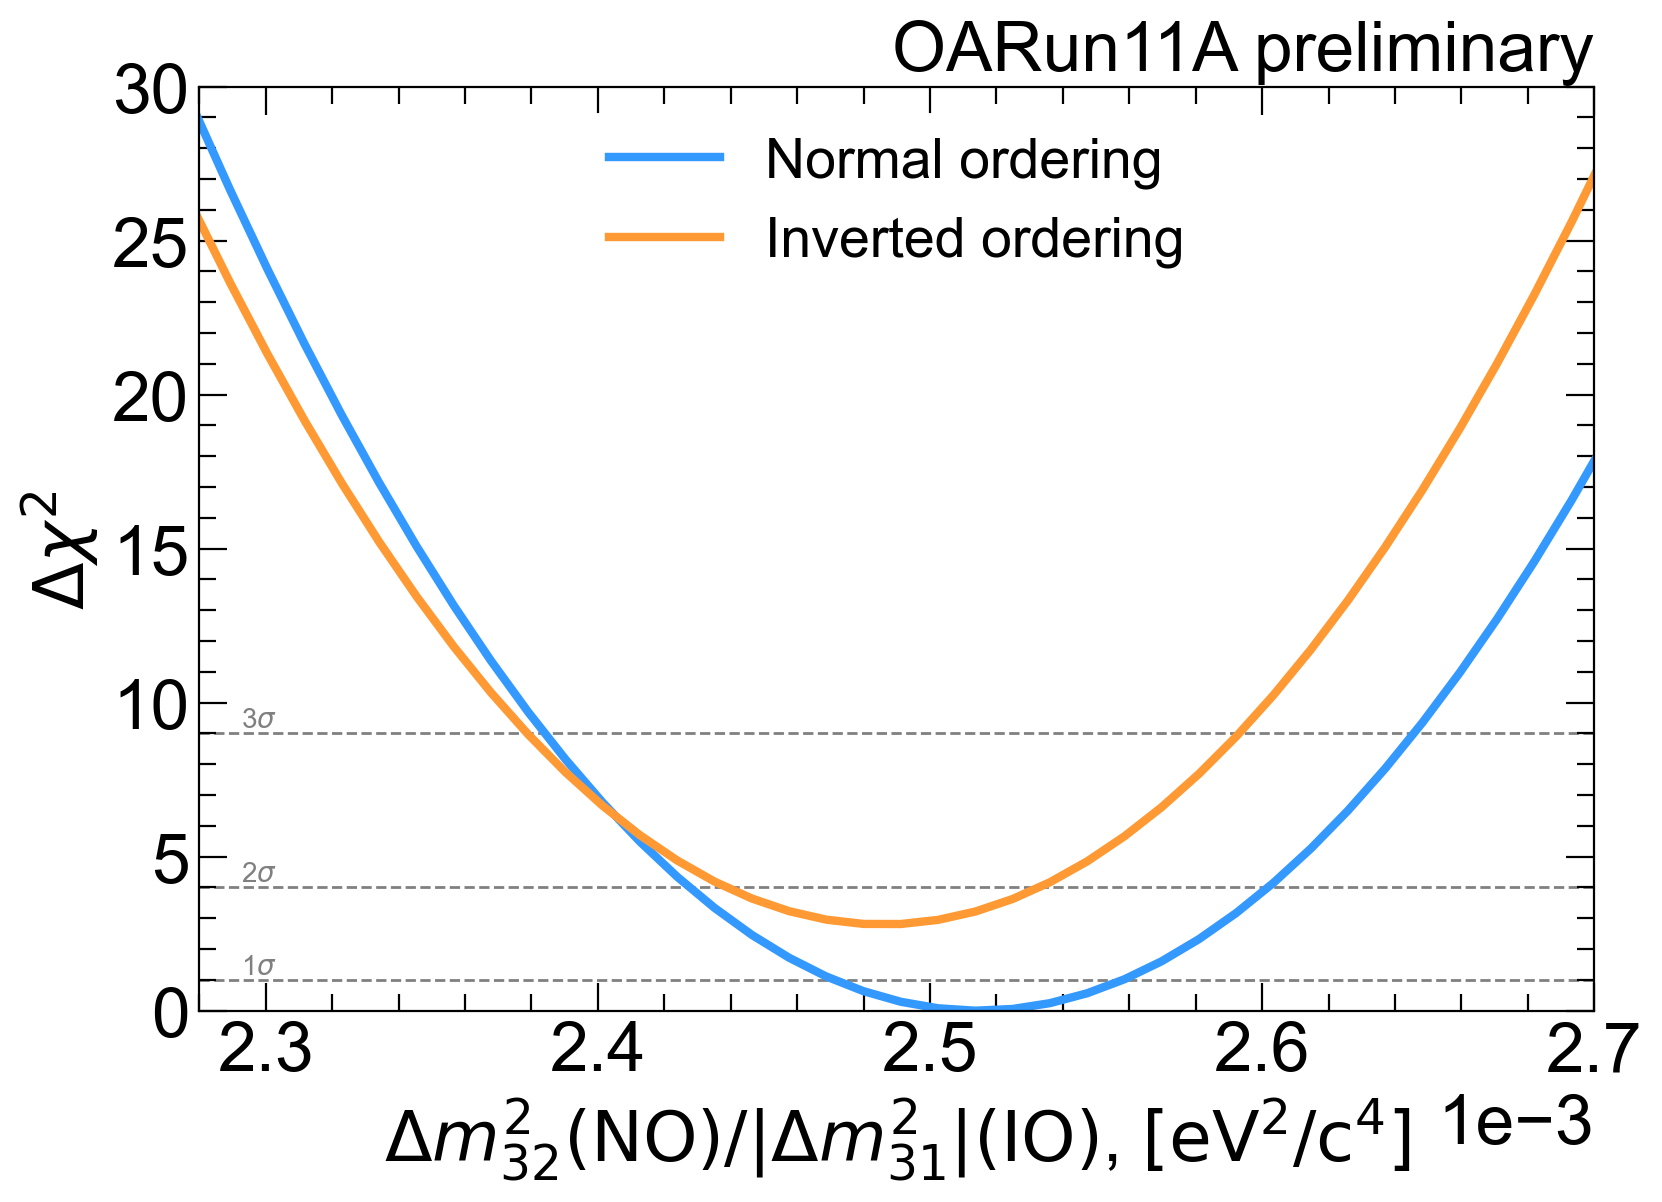

In [53]:
FC = False

if FC:
    crit_val_central_NO = get_critical_values(param_name_x, true_param_grid_sorted[param_name_x], 0, outputs_dir, dir_ver)
    crit_val_central_IO = get_critical_values(param_name_x, true_param_grid_sorted[param_name_x], 1, outputs_dir, dir_ver)
    critical_values=[crit_val_central_NO, crit_val_central_IO]
    x_critical_values = true_param_grid_sorted[param_name_x]
    show_const_critical = False
else:
    x_critical_values = None
    critical_values = None
    show_const_critical = True
    
fig, ax = plt.subplots()


llh.plot(ax, wtag=True, show_const_critical=show_const_critical, x_critical_values=x_critical_values, critical_values=critical_values)


fig.savefig(f"{outputs_dir}/plots/{dir_ver}/dchi2/dchi2_{param_name_x}_main_{prefix}.eps", bbox_inches='tight')
fig.savefig(f"{outputs_dir}/plots/{dir_ver}/dchi2/dchi2_{param_name_x}_main_{prefix}.pdf", bbox_inches='tight')
fig.savefig(f"{outputs_dir}/plots/{dir_ver}/dchi2/dchi2_{param_name_x}_main_{prefix}.png", bbox_inches='tight', dpi=300)
fig.savefig(f"{outputs_dir}/plots/{dir_ver}/dchi2/dchi2_{param_name_x}_main_{prefix}.svg", bbox_inches='tight')


# Save llh in hists

In [54]:
likelihood.save_avnll_hist(llh, destination)


Objects written in /Users/denis.carabadjac/Python/pythetatools/inputs/OA2023/MargTemplates/MargTemplates_fit_DataRun1_11_fit_data23RC_FullSyst_wRC_etheta_ptheta_dm2/hist.root
Objects written in /Users/denis.carabadjac/Python/pythetatools/inputs/OA2023/MargTemplates/MargTemplates_fit_DataRun1_11_fit_data23RC_FullSyst_wRC_etheta_ptheta_dm2/hist_IH.root
Histograms saved to ROOT files.


Warning in <TROOT::Append>: Replacing existing TH1: cont (Potential memory leak).


# Follow next cells for dm2 smearing

In [55]:
def smear_contour(smear_factor=3.3e-5, compile=False):
    if compile:
        macro_path = "../pythetatools/macros/Smear.C"
        !g++ {macro_path} -o ../build/Smear `root-config --cflags --libs`

    for suf in ['', '_IH']:
        input_file = os.path.join(destination, f'hist{suf}.root')
        output_file = os.path.join(destination, f'hist{suf}_smeared_{smear_factor}.root')
        
        !../build/Smear {input_file} {output_file} {smear_factor}
        
smear_contour(smear_factor=3.3e-5, compile=False)

TFile**		/Users/denis.carabadjac/Python/pythetatools/inputs/OA2023/MargTemplates/MargTemplates_fit_DataRun1_11_fit_data23RC_FullSyst_wRC_etheta_ptheta_dm2/hist.root	
 TFile*		/Users/denis.carabadjac/Python/pythetatools/inputs/OA2023/MargTemplates/MargTemplates_fit_DataRun1_11_fit_data23RC_FullSyst_wRC_etheta_ptheta_dm2/hist.root	
  OBJ: TH1D	cont	cont : 0 at: 0x139ea5fc0
  KEY: TH1D	cont;1	cont
  KEY: TParameter<int>	gridParam;1	
  KEY: TObjString	gridParamName;1	Collectable string class
Original number of bins: x=41
Target number of bins: x=410
0.1
Error in <TClass::LoadClassInfo>: no interpreter information for class TH2 is available even though it has a TClass initialization routine.
Error in <TClass::LoadClassInfo>: no interpreter information for class TH2 is available even though it has a TClass initialization routine.
Error in <TClass::LoadClassInfo>: no interpreter information for class TH2 is available even though it has a TClass initialization routine.
TFile**		/Users/denis.ca

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


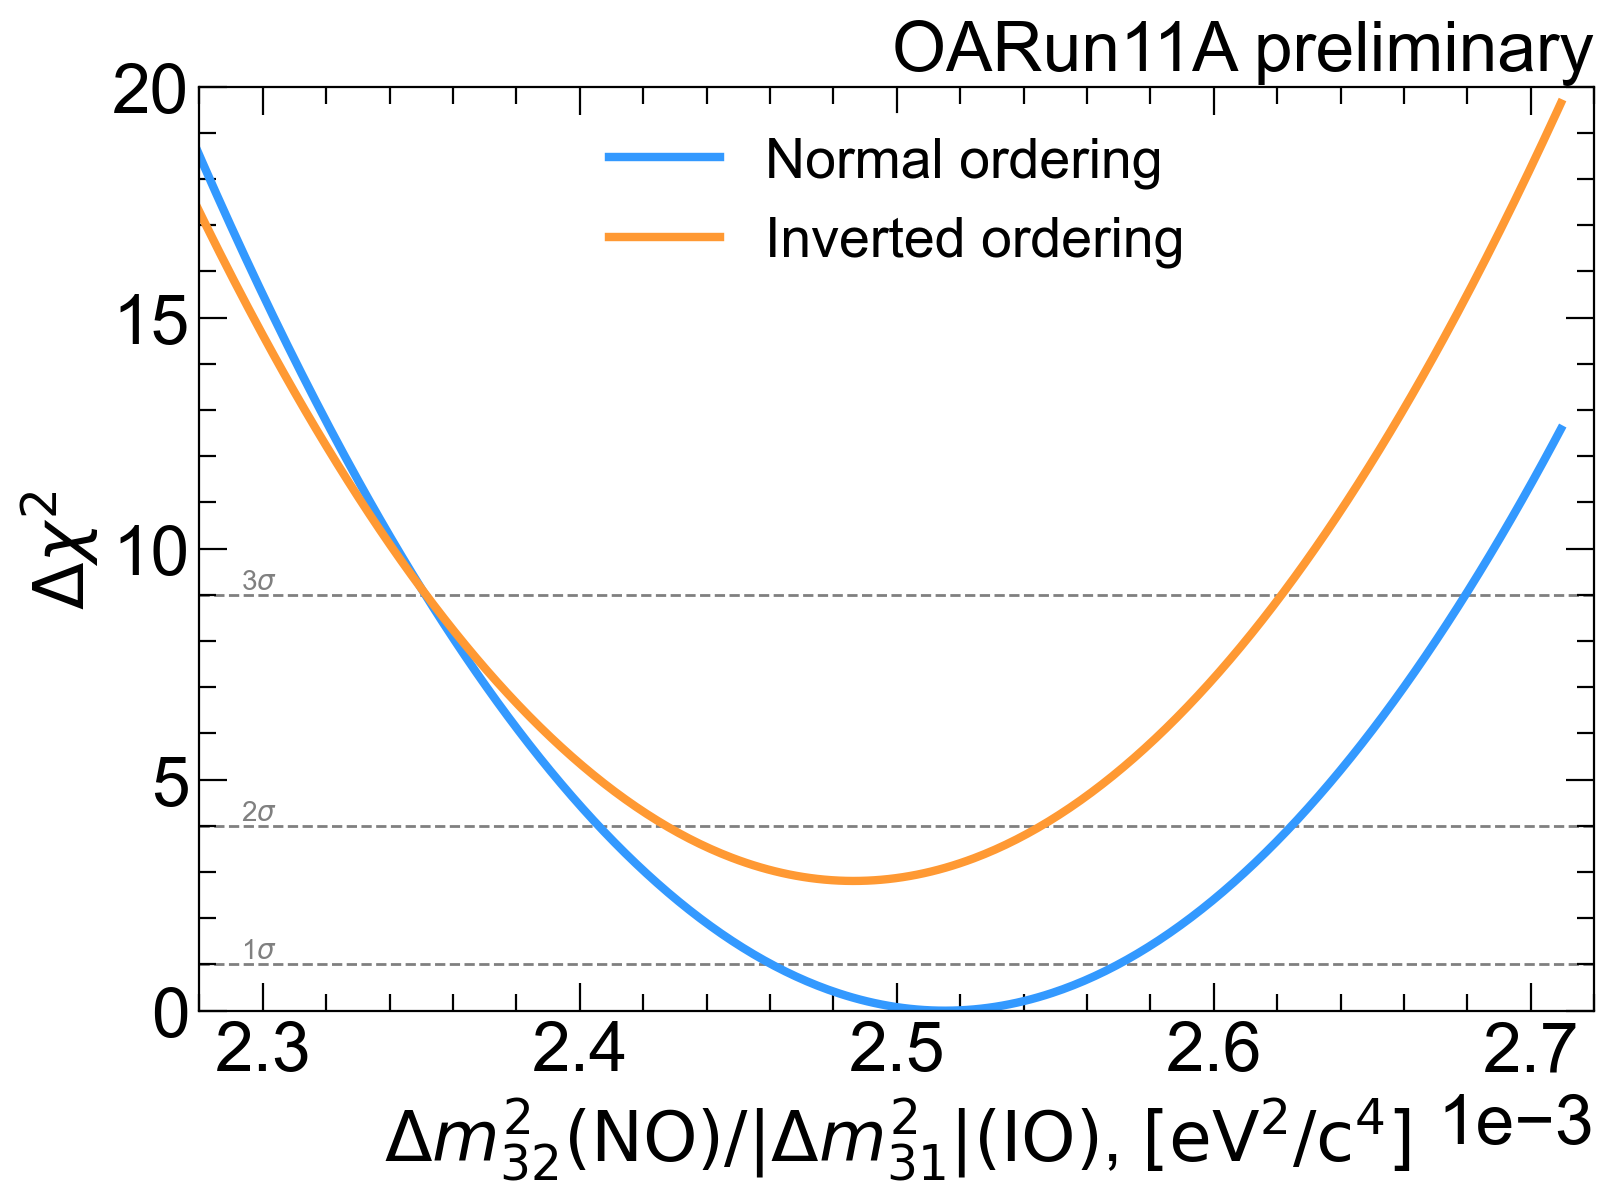

In [61]:
mo_to_suffix = {0:'', 1:'_IH'}
avnllh = {}
smear_factor = 3.3e-5
for mo in [0, 1]:
    bin_xedges, double_avnllh = read_histogram(os.path.join(destination, f'hist{mo_to_suffix[mo]}_smeared_{smear_factor}.root'), 'cont', 1)
    avnllh[mo] = double_avnllh/2
grid_x = (bin_xedges[1:]+bin_xedges[:-1])/2
grid = [grid_x]

llh_smear = likelihood.Loglikelihood(grid, avnllh, param_name, kind='joint')

fig, ax = plt.subplots()
llh_smear.plot(ax, wtag=True, ls='-')

ax.set_ylim(0, 20)

fig.savefig(f"{outputs_dir}/plots/{dir_ver}/dchi2/dchi2_{param_name_x}_main_{prefix}_smeared_smearfactor_{smear_factor}.eps", bbox_inches='tight')
fig.savefig(f"{outputs_dir}/plots/{dir_ver}/dchi2/dchi2_{param_name_x}_main_{prefix}_smeared_smearfactor_{smear_factor}.pdf", bbox_inches='tight')
fig.savefig(f"{outputs_dir}/plots/{dir_ver}/dchi2/dchi2_{param_name_x}_main_{prefix}_smeared_smearfactor_{smear_factor}.png", bbox_inches='tight', dpi=300)
fig.savefig(f"{outputs_dir}/plots/{dir_ver}/dchi2/dchi2_{param_name_x}_main_{prefix}_smeared_smearfactor_{smear_factor}.svg", bbox_inches='tight')


# Validation of the margtemplates loading

In [12]:
bin_xedges, double_avnllh = read_histogram(destination+'/hist_Lucile.root', 'cont', 1)

avnllh = {}
grid_x = (bin_xedges[1:]+bin_xedges[:-1])/2
grid = [grid_x]
avnllh[0] = double_avnllh/2

llh_Lucile = likelihood.Loglikelihood(grid, avnllh, param_name, kind='joint')

bin_xedges, double_avnllh = read_histogram(destination+'/hist_smeared_Lucile.root', 'cont', 1)

avnllh = {}
grid_x = (bin_xedges[1:]+bin_xedges[:-1])/2
grid = [grid_x]
avnllh[0] = double_avnllh/2

llh_smeared_Lucile = likelihood.Loglikelihood(grid, avnllh, param_name, kind='joint')

(0.0, 10.0)

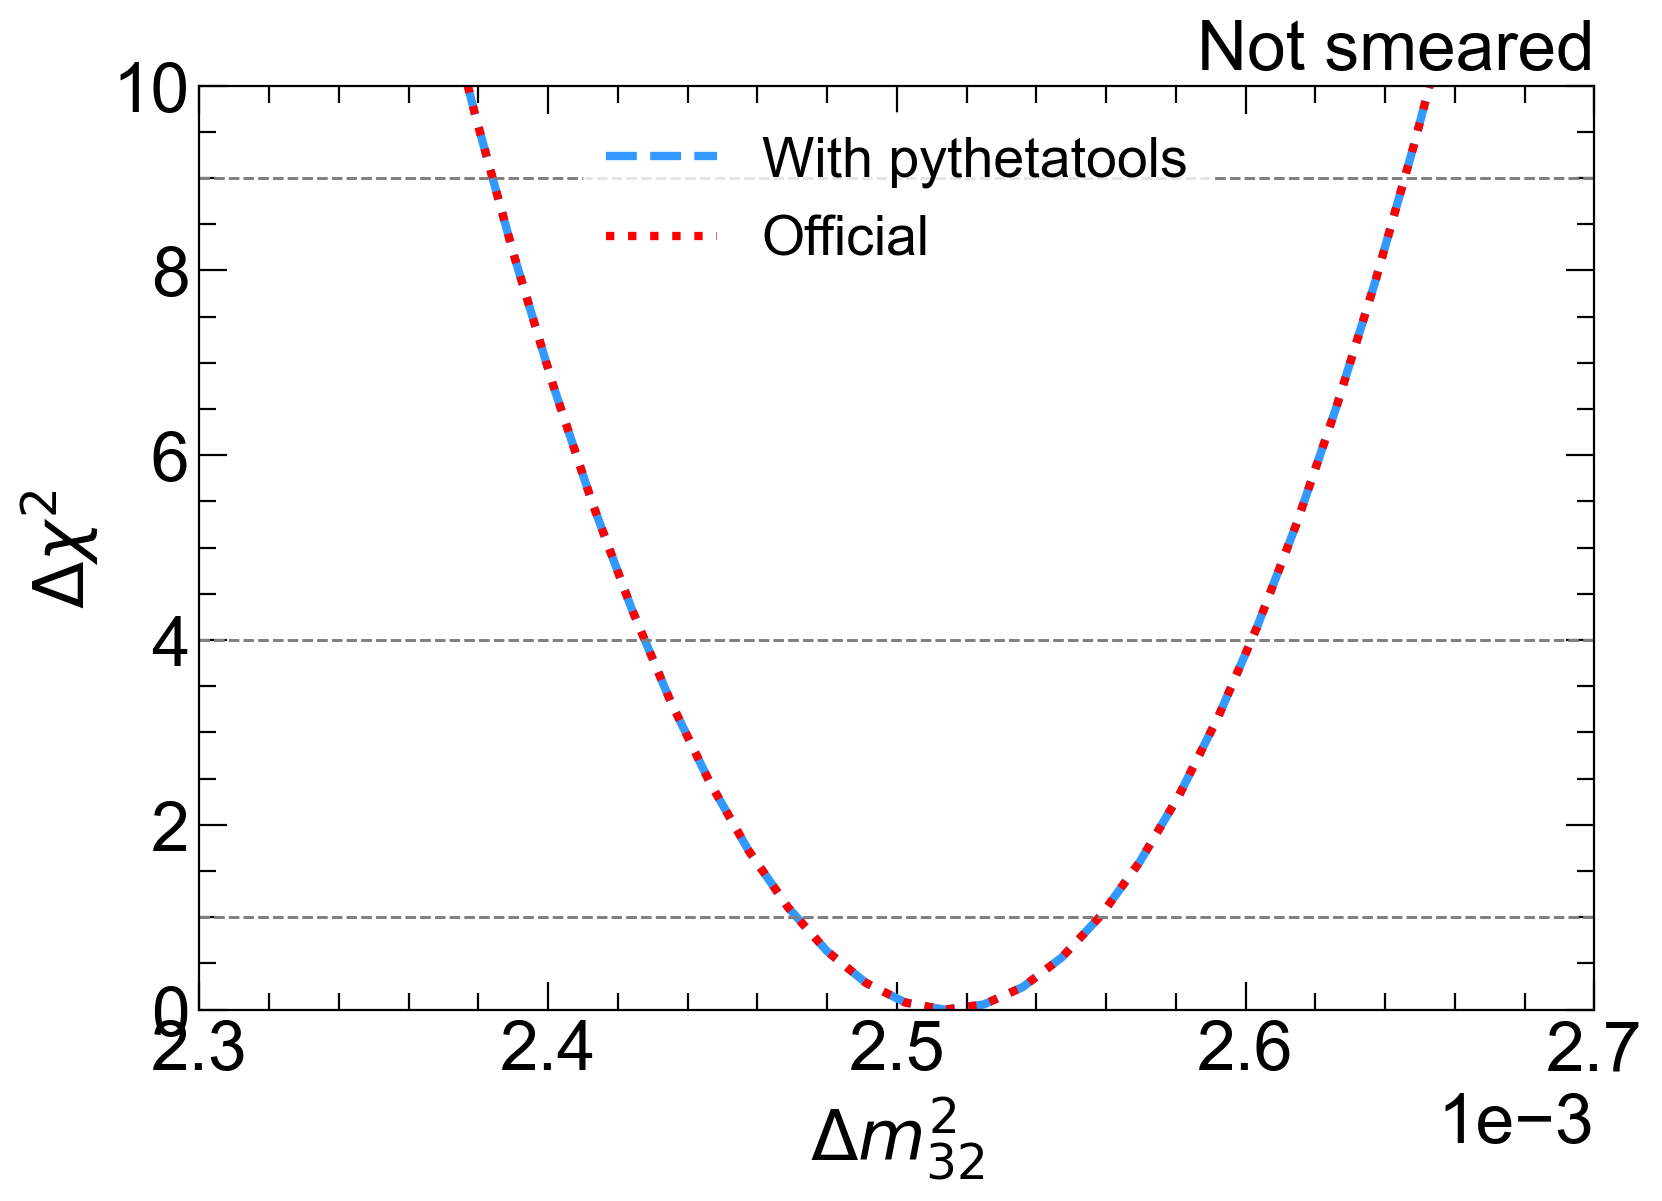

In [13]:
fig, ax = plt.subplots()
llh.plot(ax, mo=0, label='With pythetatools', ls='--')
llh_Lucile.plot(ax, mo=0, color='red', label='Official', ls='dotted')

ax.set_title('Not smeared', loc='right')
ax.set_xlim(2.3e-3, 2.7e-3)
ax.set_ylim(0, 10)

In [17]:
avnllh = {}
smear_factor = 3.5e-5
for mo in [0, 1]:
    bin_xedges, double_avnllh = read_histogram(os.path.join(destination, f'hist{mo_to_suffix[mo]}_smeared_{smear_factor}.root'), 'cont', 1)
    avnllh[mo] = double_avnllh/2
grid_x = (bin_xedges[1:]+bin_xedges[:-1])/2
grid = [grid_x]
llh_smear_3_5 = likelihood.Loglikelihood(grid, avnllh, param_name, kind='joint')

(0.0, 10.0)

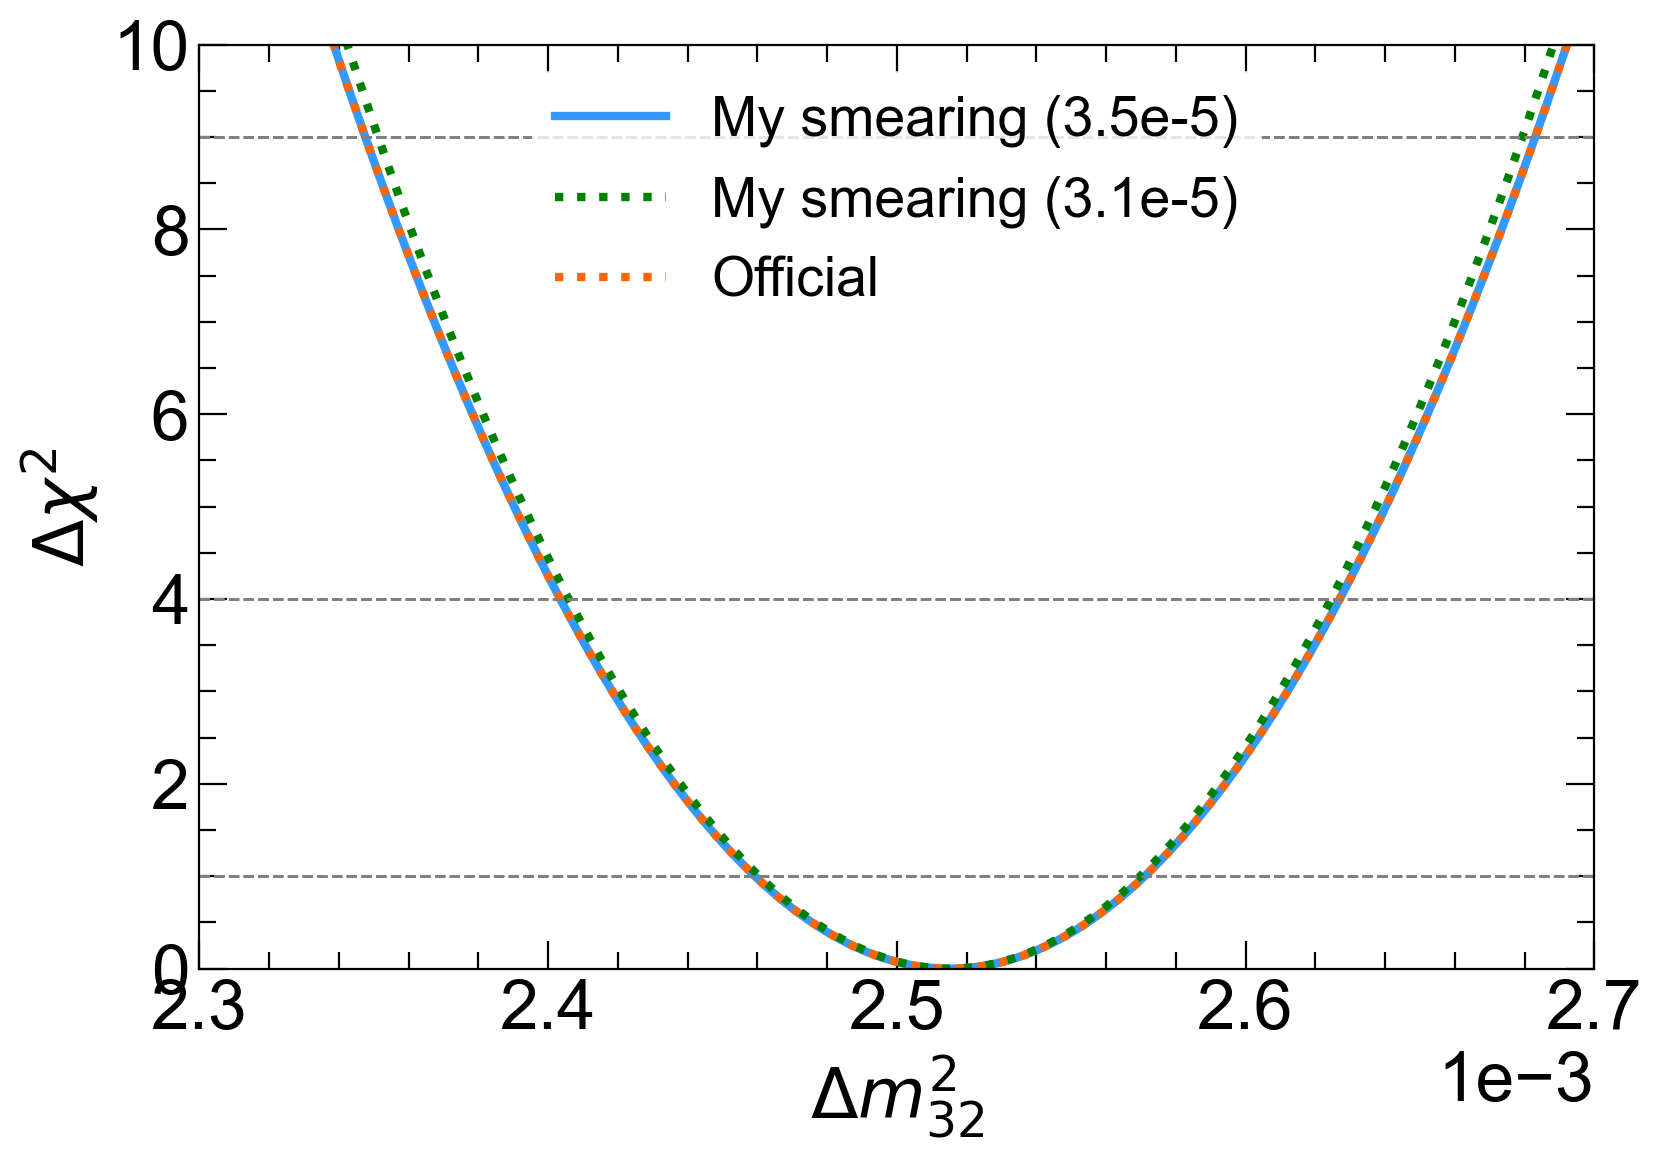

In [26]:
fig, ax = plt.subplots()
llh_smear_3_5.plot(ax, mo=0, color=midblue, label='My smearing (3.5e-5)', ls='-')
llh_smear.plot(ax, mo=0, color='green', label='My smearing (3.1e-5)', ls='dotted')
llh_smeared_Lucile.plot(ax, mo=0, color=darkorange, label='Official', ls='dotted')

ax.set_xlim(2.3e-3, 2.7e-3)
ax.set_ylim(0, 10)